In [1]:
%%time
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'class-specific_q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol, excludedCols = excluded)
features = [x for x in list(dSlow.columns) if (x not in excluded)]

file read...
strings converted to floats...
q-values estimated...
ranks computed...
features normed...
floats converted to int...
file ready!
Wall time: 14.2 s


Training in iteration 1 with split 1/3 starts!
len of positive trainingset: 1496, len of negative training set: 5806

Optimal parameters are C=10 and class_weight={0: 30, 1: 10}.
Training in iteration 1 with split 2/3 starts!
len of positive trainingset: 1792, len of negative training set: 5807

Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.
Training in iteration 1 with split 3/3 starts!
len of positive trainingset: 2084, len of negative training set: 5807

Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.
Iteration 1/10 done!
Training in iteration 2 with split 1/3 starts!
len of positive trainingset: 2071, len of negative training set: 5806

Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.
Training in iteration 2 with split 2/3 starts!
len of positive trainingset: 2201, len of negative training set: 5807

Optimal parameters are C=10 and class_weight={0: 3, 1: 10}.
Training in iteration 2 with split 3/3 starts!
len of positive trainingset: 2222, len of

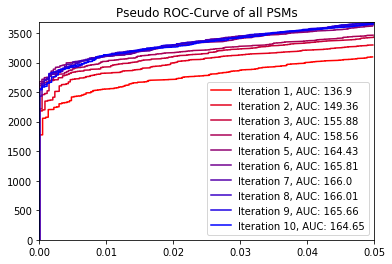

Training in iteration 1 with split 1/3 starts!
len of positive trainingset: 2161, len of negative training set: 22588

Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.
Training in iteration 1 with split 2/3 starts!
len of positive trainingset: 2258, len of negative training set: 22588

Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.
Training in iteration 1 with split 3/3 starts!
len of positive trainingset: 2386, len of negative training set: 22588

Optimal parameters are C=10 and class_weight={0: 10, 1: 10}.
Iteration 1/10 done!
Training in iteration 2 with split 1/3 starts!
len of positive trainingset: 2490, len of negative training set: 22588

Optimal parameters are C=0.1 and class_weight={0: 10, 1: 10}.
Training in iteration 2 with split 2/3 starts!
len of positive trainingset: 2643, len of negative training set: 22588

Optimal parameters are C=1 and class_weight={0: 10, 1: 10}.
Training in iteration 2 with split 3/3 starts!
len of positive trainingset: 276

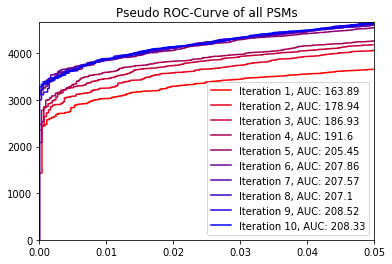

Wall time: 3min 54s


In [38]:
%%time 

# Experiment: mit den verschiedenen Klassen je einzeln trainieren
class1 = dSlow.loc[dSlow['NuXL:XL_C'] == 1]
class2 = dSlow.loc[dSlow['NuXL:XL_C'] == 0]

saveName = ''

pxl = percolator_experimental(class1, idCol, features, optimalRanking = 4, specialGrid = True, propTarDec = True, balancingInner = True, balancingOuter = True, rankOption = False, plotSaveName = saveName, plotXLnXL = False)
pnxl = percolator_experimental(class2, idCol, features, optimalRanking = 4, specialGrid = True, propTarDec = True, balancingInner = True, balancingOuter = True, rankOption = False, plotSaveName = saveName, plotXLnXL = False)

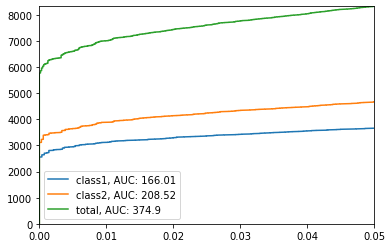

In [39]:
pseudoROC(pxl, label = 'class1')
pseudoROC(pnxl, label = 'class2')
p = pd.concat([pxl,pnxl])
p = ph.calcQ(p, 'q-val', addXlQ = False, ascending = True)
pseudoROC(p, label = 'total')
plt.savefig('Test.png')

In [40]:
len(p.loc[p['q-val'] < 0.01])

7007